In [23]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# アイリスクラスの分類

## データセットの確認
与えられたデータから3種類のアイリスを分類
- データ:**'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'** (sepal=ガク, petal:花弁)
- 分類:**'setosa' 'versicolor' 'virginica'**

In [8]:
print(iris_dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [11]:
print(iris_dataset['DESCR'][:193] + '\n')

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att



In [13]:
print('Target names:{}'.format(iris_dataset['target_names']))

Target names:['setosa' 'versicolor' 'virginica']


In [14]:
print('Feature names:{}'.format(iris_dataset['feature_names']))

Feature names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print('Type of data:{}'.format(type(iris_dataset['data'])))

Type of data:<class 'numpy.ndarray'>


In [16]:
print('Shape of data:{}'.format(iris_dataset['data'].shape))

Shape of data:(150, 4)


In [17]:
print('First five columns of data: {}'.format(iris_dataset['data'][:5]))

First five columns of data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [19]:
print('Type of Target: {}'.format(type(iris_dataset['target'])))

Type of Target: <class 'numpy.ndarray'>


In [21]:
print('Shpae of Target: {}'.format(iris_dataset['target'].shape))

Shpae of Target: (150,)


In [22]:
print('Target:\n{}'.format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 訓練データとテストデータの分割
75％を訓練データとして、残り25％をテストデータとして使用する  
訓練データから学習してテストデータを予測する

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [36]:
print('X_train shape:{} y_train shape:{}'.format(X_train.shape,y_train.shape))
print('X_test shape:{} y_test shape:{}'.format(X_test.shape,y_test.shape))


X_train shape:(112, 4) y_train shape:(112,)
X_test shape:(38, 4) y_test shape:(38,)


## EDA(探索的データ解析)

In [38]:
#IrisのデータをDataFrameに変換する
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris_df = pd.DataFrame(X_train,columns=iris_dataset['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3


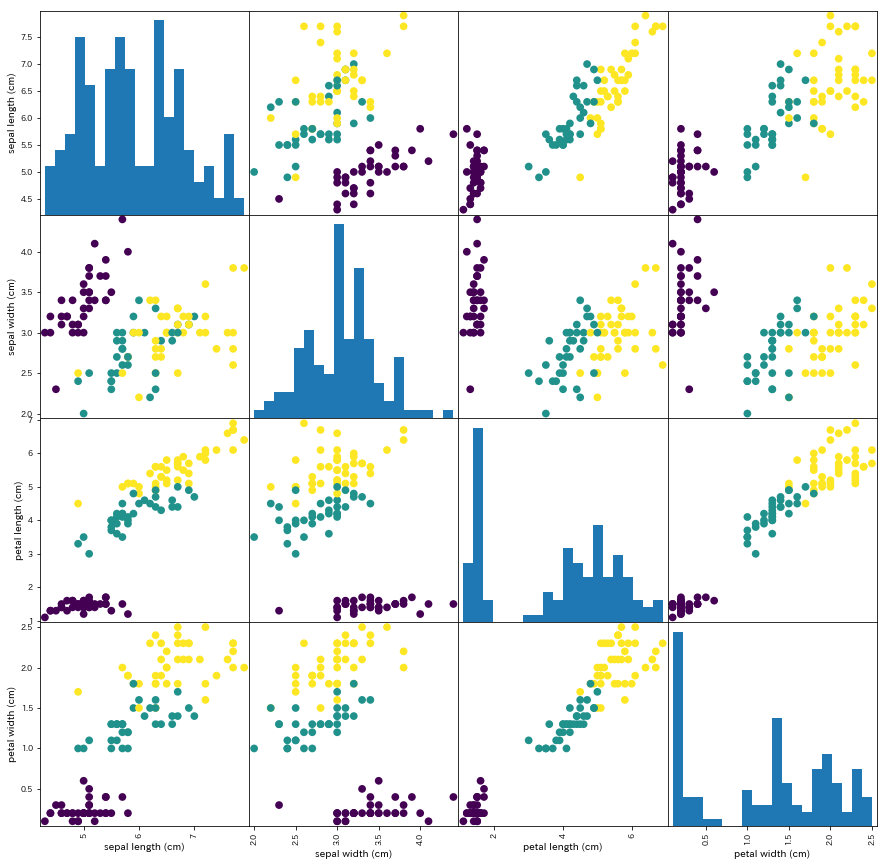

In [45]:
grr = pd.plotting.scatter_matrix(iris_df,c=y_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=8)

3つのクラスはそれぞれのデータでよく分離されていることが分かる。  
これをk-最近傍法で分類する。詳しくはch2で解説。今回は近傍点を1に設定する

## モデリング

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [54]:
#学習モデルを適用して予測する

X_new = np.array([[5,2.9,1,0.2]])
prediction = knn.predict(X_new)
print('prediction:{}'.format(prediction))
print('Predicted target name:{}'.format(iris_dataset['target_names'][prediction]))

prediction:[0]
Predicted target name:['setosa']


適当な数字を入力することによってモデルは0と判別。これはsetosaというラベルであることがわかった

### モデルの評価

In [63]:
#テストデータをモデルにかけて、ラベルの出力させる。結果のラベルの的中率を出力
y_pred = knn.predict(X_test)
print('Test set predictions:{}'.format(y_pred))
print('Test set score:{:.2f}'.format(np.mean(y_pred == y_test)))
#scoreメソッドでもよい
print('Test set socre:{:.2f}'.format(knn.score(X_test,y_test)))

Test set predictions:[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Test set score:0.97
Test set socre:0.97


## まとめ
k-最近傍法を用いることによってアイリスの品種を3つの特徴量から97％で判別することができた。これは未知のデータが与えられたら97％の確率でそのアイリスの品種を97％で判別できることを意味する  
以降の章ではさらに性能の向上を図る